## COVID 19 Predictions



- ### Step 1: Data Visualization
- ### Step 2: Prediction using XGBRegressor



In [224]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
%matplotlib inline
import pandas_profiling
import re

# for showing data on the maps/location
import plotly.express as px
import plotly.graph_objects as go

import datetime
import datetime as dt
from datetime import date, datetime, timedelta

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# widgets
import ipywidgets as widgets
from IPython.display import display
output = widgets.Output()
plot_output = widgets.Output()

In [172]:
widgets.IntSlider(
    min=0,
    max=100,
    step=1,
    description='Slider:',
    value=3
)

IntSlider(value=3, description='Slider:')

In [134]:
# Variable Declarations:
STATE_CODE = 'State_Code'
PROVINCE_OR_STATE = 'Province_State'
COUNTRY_REGION = 'Country_Region'
COUNTRY_ISO3 = 'iso3'
COUNTRY_CODE = 'Country_Code'
FORWARD_SLASH = "/"
UNDERSCORE = "_"
RANGE_OF_DAYS = -30
DATE_FORMAT = "%m-%d-%Y"
DATE_FORMAT_INPUT = "%Y-%m-%d"

BASE_DIR = 'Z://$STUDY/IIIT/Kaggle/COVID_19/'

# dictionary for Countries and thier iso3 codes.
country_iso3 = {'Aruba':'ABW','Afghanistan':'AFG','Angola':'AGO','Anguilla':'AIA','Åland Islands':'ALA','Albania':'ALB','Andorra':'AND','United Arab Emirates':'ARE','Argentina':'ARG','Armenia':'ARM','American Samoa':'ASM','Antarctica':'ATA','French Southern Territories':'ATF','Antigua and Barbuda':'ATG','Australia':'AUS','Austria':'AUT','Azerbaijan':'AZE','Burundi':'BDI','Belgium':'BEL','Benin':'BEN','Bonaire, Sint Eustatius and Saba':'BES','Burkina Faso':'BFA','Bangladesh':'BGD','Bulgaria':'BGR','Bahrain':'BHR','Bahamas':'BHS','Bosnia and Herzegovina':'BIH','Saint Barthélemy':'BLM','Belarus':'BLR','Belize':'BLZ','Bermuda':'BMU','Bolivia, Plurinational State of':'BOL','Brazil':'BRA','Barbados':'BRB','Brunei Darussalam':'BRN','Bhutan':'BTN','Bouvet Island':'BVT','Botswana':'BWA','Central African Republic':'CAF','Canada':'CAN','Cocos (Keeling) Islands':'CCK','Switzerland':'CHE','Chile':'CHL','China':'CHN','Côte d’Ivoire':'CIV','Cameroon':'CMR','Congo, the Democratic Republic of the':'COD','Congo':'COG','Cook Islands':'COK','Colombia':'COL','Comoros':'COM','Cape Verde':'CPV','Costa Rica':'CRI','Cuba':'CUB','Curaçao':'CUW','Christmas Island':'CXR','Cayman Islands':'CYM','Cyprus':'CYP','Czech Republic':'CZE','Germany':'DEU','Djibouti':'DJI','Dominica':'DMA','Denmark':'DNK','Dominican Republic':'DOM','Algeria':'DZA','Ecuador':'ECU','Egypt':'EGY','Eritrea':'ERI','Western Sahara':'ESH','Spain':'ESP','Estonia':'EST','Ethiopia':'ETH','Finland':'FIN','Fiji':'FJI','Falkland Islands (Malvinas)':'FLK','France':'FRA','Faroe Islands':'FRO','Micronesia, Federated States of':'FSM','Gabon':'GAB','United Kingdom':'GBR','Georgia':'GEO','Guernsey':'GGY','Ghana':'GHA','Gibraltar':'GIB','Guinea':'GIN','Guadeloupe':'GLP','Gambia':'GMB','Guinea-Bissau':'GNB','Equatorial Guinea':'GNQ','Greece':'GRC','Grenada':'GRD','Greenland':'GRL','Guatemala':'GTM','French Guiana':'GUF','Guam':'GUM','Guyana':'GUY','Hong Kong':'HKG','Heard Island and McDonald Islands':'HMD','Honduras':'HND','Croatia':'HRV','Haiti':'HTI','Hungary':'HUN','Indonesia':'IDN','Isle of Man':'IMN','India':'IND','British Indian Ocean Territory':'IOT','Ireland':'IRL','Iran, Islamic Republic of':'IRN','Iraq':'IRQ','Iceland':'ISL','Israel':'ISR','Italy':'ITA','Jamaica':'JAM','Jersey':'JEY','Jordan':'JOR','Japan':'JPN','Kazakhstan':'KAZ','Kenya':'KEN','Kyrgyzstan':'KGZ','Cambodia':'KHM','Kiribati':'KIR','Saint Kitts and Nevis':'KNA','Korea, Republic of':'KOR','Kuwait':'KWT','Lao People’s Democratic Republic':'LAO','Lebanon':'LBN','Liberia':'LBR','Libya':'LBY','Saint Lucia':'LCA','Liechtenstein':'LIE','Sri Lanka':'LKA','Lesotho':'LSO','Lithuania':'LTU','Luxembourg':'LUX','Latvia':'LVA','Macao':'MAC','Saint Martin (French part)':'MAF','Morocco':'MAR','Monaco':'MCO','Moldova, Republic of':'MDA','Madagascar':'MDG','Maldives':'MDV','Mexico':'MEX','Marshall Islands':'MHL','Macedonia, the former Yugoslav Republic of':'MKD','Mali':'MLI','Malta':'MLT','Myanmar':'MMR','Montenegro':'MNE','Mongolia':'MNG','Northern Mariana Islands':'MNP','Mozambique':'MOZ','Mauritania':'MRT','Montserrat':'MSR','Martinique':'MTQ','Mauritius':'MUS','Malawi':'MWI','Malaysia':'MYS','Mayotte':'MYT','Namibia':'NAM','New Caledonia':'NCL','Niger':'NER','Norfolk Island':'NFK','Nigeria':'NGA','Nicaragua':'NIC','Niue':'NIU','Netherlands':'NLD','Norway':'NOR','Nepal':'NPL','Nauru':'NRU','New Zealand':'NZL','Oman':'OMN','Pakistan':'PAK','Panama':'PAN','Pitcairn':'PCN','Peru':'PER','Philippines':'PHL','Palau':'PLW','Papua New Guinea':'PNG','Poland':'POL','Puerto Rico':'PRI','Korea, Democratic People’s Republic of':'PRK','Portugal':'PRT','Paraguay':'PRY','Palestine, State of':'PSE','French Polynesia':'PYF','Qatar':'QAT','Réunion':'REU','Romania':'ROU','Russia':'RUS','Rwanda':'RWA','Saudi Arabia':'SAU','Sudan':'SDN','Senegal':'SEN','Singapore':'SGP','South Georgia and the South Sandwich Islands':'SGS','Saint Helena, Ascension and Tristan da Cunha':'SHN','Svalbard and Jan Mayen':'SJM','Solomon Islands':'SLB','Sierra Leone':'SLE','El Salvador':'SLV','San Marino':'SMR','Somalia':'SOM','Saint Pierre and Miquelon':'SPM','Serbia':'SRB','South Sudan':'SSD','Sao Tome and Principe':'STP','Suriname':'SUR','Slovakia':'SVK','Slovenia':'SVN','Sweden':'SWE','Swaziland':'SWZ','Sint Maarten (Dutch part)':'SXM','Seychelles':'SYC','Syrian Arab Republic':'SYR','Turks and Caicos Islands':'TCA','Chad':'TCD','Togo':'TGO','Thailand':'THA','Tajikistan':'TJK','Tokelau':'TKL','Turkmenistan':'TKM','Timor-Leste':'TLS','Tonga':'TON','Trinidad and Tobago':'TTO','Tunisia':'TUN','Turkey':'TUR','Tuvalu':'TUV','Taiwan, Province of China':'TWN','Tanzania, United Republic of':'TZA','Uganda':'UGA','Ukraine':'UKR','United States Minor Outlying Islands':'UMI','Uruguay':'URY','United States':'USA','US':'USA','Uzbekistan':'UZB','Holy See (Vatican City State)':'VAT','Saint Vincent and the Grenadines':'VCT','Venezuela, Bolivarian Republic of':'VEN','Virgin Islands, British':'VGB','Virgin Islands, U.S.':'VIR','Viet Nam':'VNM','Vanuatu':'VUT','Wallis and Futuna':'WLF','Samoa':'WSM','Yemen':'YEM','South Africa':'ZAF','Zambia':'ZMB','Zimbabwe':'ZWE'}

def getISO3CountryCode(country):
    return country_iso3.get(country)


In [135]:
# import the CSV files for train_dates:
train = pd.read_csv(BASE_DIR+'train.csv',encoding='ISO-8859-1',low_memory=False)
train_country = train.loc[train[COUNTRY_REGION] == 'Afghanistan']
train_dates = list(train_country['Date'])

# import the CSV files for test_dates:
test = pd.read_csv(BASE_DIR+'test.csv',encoding='ISO-8859-1',low_memory=False)
test_country = test.loc[test[COUNTRY_REGION] == 'Afghanistan']
test_dates = list(test_country['Date'])

start_date_train = datetime.strptime(train_dates[0], DATE_FORMAT_INPUT).strftime(DATE_FORMAT)
end_date_train = datetime.strptime(train_dates[-1], DATE_FORMAT_INPUT).strftime(DATE_FORMAT)
start_date_test = datetime.strptime(test_dates[0], DATE_FORMAT_INPUT).strftime(DATE_FORMAT)
end_date_test = datetime.strptime(test_dates[-1], DATE_FORMAT_INPUT).strftime(DATE_FORMAT)

print('TRAIN:::>  START DATE =',start_date_train, ' END DATE =',end_date_train)
print('TEST::::>  START DATE =',start_date_test, ' END DATE =',end_date_test)

test_start = datetime.strptime(start_date_test, DATE_FORMAT).toordinal()
test_end = datetime.strptime(end_date_test, DATE_FORMAT).toordinal()

TRAIN:::>  START DATE = 01-22-2020  END DATE = 04-04-2020
TEST::::>  START DATE = 03-26-2020  END DATE = 05-07-2020


In [136]:
display(train.head())
display(train.describe())
display(train.info())

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

Id  ConfirmedCases    Fatalities
count  22644.000000    22644.000000  22644.000000
mean   16355.000000      655.267002     29.015412
std     9451.983632     5428.632429    382.138505
min        1.000000        0.000000      0.000000
25%     8169.750000        0.000000      0.000000
50%    16355.000000        0.000000      0.000000
75%    24540.250000       51.000000      0.000000
max    32709.000000   126168.000000  15362.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22644 entries, 0 to 22643
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              22644 non-null  int64  
 1   Province_State  9620 non-null   object 
 2   Country_Region  22644 non-null  object 
 3   Date            22644 non-null  object 
 4   ConfirmedCases  22644 non-null  float64
 5   Fatalities      22644 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.0+ MB


None

## Step 1: Data Visualization

In [137]:
# import the CSV files for lookup:
lookUp = pd.read_csv(BASE_DIR+'UID_ISO_FIPS_LookUp_Table.csv',encoding='ISO-8859-1',low_memory=False)
#iso_list = set(list(lookUp[COUNTRY_ISO3].iloc[:]))
   
def getISO3CountryCodeFromLookUp(country):
    lookupRow = lookUp.loc[lookUp[COUNTRY_REGION] == country]
    if not lookupRow.empty:
        lookupRow = lookupRow[COUNTRY_ISO3].astype('str')
        return lookupRow.iloc[-1]
    else:
        return country[0:4].upper()

In [138]:
def showMapStats(location_codes, location_names, case_counts, location_mode, last_date, geo_scope, state):
    fig = go.Figure(data=go.Choropleth(
        locations = location_codes,
        z = case_counts,
        text = location_names,
        locationmode = location_mode,
        colorscale = 'ice',
        autocolorscale=False,
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = 'No.of Confirmed Cases',
    ))

    fig.update_layout(
        title_text='COVID 19 '+state+' cases on ' + last_date,    
        geo_scope=geo_scope,
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="www.flexylabs.info">\
                flexylabs.info</a>',
            showarrow = False
        )]
    )

    fig.show()


In [139]:
train_map = train.copy()
train_map['Date'] = train_map['Date'].astype(str)
train_map = train_map.groupby(['Date','Country_Region'], as_index=False)['ConfirmedCases','Fatalities'].sum()
train_map[COUNTRY_ISO3] = train_map['Country_Region']
train_map[COUNTRY_ISO3] = train_map[COUNTRY_ISO3].apply(lambda x: getISO3CountryCode(x))
train_map.head()

Date Country_Region  ConfirmedCases  Fatalities iso3
0  2020-01-22    Afghanistan             0.0         0.0  AFG
1  2020-01-22        Albania             0.0         0.0  ALB
2  2020-01-22        Algeria             0.0         0.0  DZA
3  2020-01-22        Andorra             0.0         0.0  AND
4  2020-01-22         Angola             0.0         0.0  AGO

In [140]:
train_map_temp = train_map[train_map['Country_Region'] == 'Russia']
train_map_temp.head()

Date Country_Region  ConfirmedCases  Fatalities iso3
137  2020-01-22         Russia             0.0         0.0  RUS
317  2020-01-23         Russia             0.0         0.0  RUS
497  2020-01-24         Russia             0.0         0.0  RUS
677  2020-01-25         Russia             0.0         0.0  RUS
857  2020-01-26         Russia             0.0         0.0  RUS

In [141]:
train_map['ln(ConfirmedCases)'] = np.log(train_map.ConfirmedCases + 1)
train_map['ln(Fatalities)'] = np.log(train_map.Fatalities + 1)

### World Map showing the increase of confirmed cases on time series

In [142]:
px.choropleth(train_map, 
              locations="iso3", 
              color="ConfirmedCases", 
              hover_name="Country_Region", 
              hover_data=["ConfirmedCases"] ,
              animation_frame="Date",
              color_continuous_scale=px.colors.sequential.algae, 
              title='Total Confirmed Cases growth(Logarithmic Scale)')

### World Map showing the increase of Fatalities on time series

In [143]:
px.choropleth(train_map, 
              locations="iso3", 
              color="Fatalities", 
              hover_name="Country_Region", 
              hover_data=["Fatalities"] ,
              animation_frame="Date",
              color_continuous_scale=px.colors.sequential.Reds,
              title='Total Fatalities growth(Logarithmic Scale)')

### Top most effected countries

In [162]:
# Get the latest date of the country
latest_date = train['Date'].max()
top10_train = train[train['Date'] == latest_date]

# Filter the dataframe based on top 10 highest count on confirmed and Fatalities cases.
top10_train_confirmed_cases = top10_train.nlargest(10, ['ConfirmedCases'])
top10_train_fatalities = top10_train.nlargest(10, ['Fatalities'])

# Filter the top 10 countries for confirmed and Fatalities.
top10_confirmed_countries = list(top10_train_confirmed_cases['Country_Region'])
top10_fatalities_countries = list(top10_train_fatalities['Country_Region'])

top10_confirmed = train[train['Country_Region'].apply(lambda x: x in top10_confirmed_countries)]
top10_fatalities = train[train['Country_Region'].apply(lambda x: x in top10_fatalities_countries)]

#top10_confirmed = top10_confirmed.groupby('Country_Region').sum()
#display(top10_confirmed)
#top10_fatalities = top10_fatalities.groupby('Country_Region').sum()
#display(top10_fatalities)

In [165]:
px.line(top10_confirmed, x='Date', y='ConfirmedCases', color='Country_Region', title='Top 10 most effected countries on confirmed cases')

In [168]:
px.line(top10_fatalities, x='Date', y='Fatalities', color='Country_Region', title='Top 10 most effected countries on fatalities')

In [238]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

def unique_sorted_value_list_plus_ALL(values):
    values.sort()
    values.insert(0, ALL)
    return values

top10countries = widgets.Dropdown(options = unique_sorted_values_plus_ALL(top10_confirmed.Country_Region))

def dropdown_year_eventhandler(change):
    if (change.new == ALL):
        display(top10_confirmed)
    else:
        display(top10_confirmed[top10_confirmed.Country_Region == change.new])

top10countries.observe(dropdown_year_eventhandler, names='value')

display(dropdown_year)

Dropdown(options=('ALL', 'China', 'France', 'Germany', 'Iran', 'Italy', 'Spain', 'Turkey', 'US', 'United Kingd…

## Scatter Plot definitions for individual and comparision

In [255]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

def scatterPlotGCFuture(df, country, title, xlabel, ylabel, days):
    df = df[df.Country_Region == country] 
    df = df[days:]
    
    plt.scatter(df.Date, df.ConfirmedCases)  # plot scatter plot
    plt.plot(df.Date, df.ConfirmedCases) # line to connect the points)
    plt.xticks(rotation='vertical') # rotate x axis labels text to vertical inorder for it to show up and not cluster together
    plt.title(country + title) # set graph title
    plt.xlabel(xlabel) # set y axis label
    plt.ylabel(ylabel) # set y axis label
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f')) # turn of scientific notations
    plt.show() # display graph  

    
def scatterPlotCompare(df1, df2, col1, col2, country1, country2, title, xlabel, ylabel, days):
    df1 = df1[df1.Country_Region == country1] 
    df1 = df1[days:]
    
    df2 = df2[df2.Country_Region == country2] 
    df2 = df2[days:]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    ax1.scatter(df1.Date, df1[col1], s=50, c='b', label=country1)
    ax1.scatter(df2.Date, df2[col2], s=50, c='r', label=country2)
    plt.legend(loc='upper left');
    plt.xticks(rotation='vertical') # rotate x axis labels text to vertical inorder for it to show up and not cluster together
    plt.title(country1 +' vs '+ country2 +' '+ title) # set graph title
    plt.xlabel(xlabel) # set y axis label
    plt.ylabel(ylabel) # set y axis label
    #plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f')) # turn of scientific notations
    plt.figure(figsize=(40,30))
    plt.show() # display graph




In [233]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

def getDropdownArrayList(array):
    return widgets.Dropdown(options = unique_sorted_values_plus_ALL(array))

def getDropdownList(df, col):
    return widgets.Dropdown(options = unique_sorted_values_plus_ALL(df[col]))

countries_dropdown = getDropdownList(top10_confirmed, 'Country_Region')

def on_country_change(change):
    if (change.new == ALL):
        display('Please select a country')
    else:
        scatterPlotGCFuture(top10_confirmed, change.new,
                    '\'s Total Positive Cases prediction from past '+ str(abs(RANGE_OF_DAYS)) +' days to next '+ str(abs(RANGE_OF_DAYS)), 
                    'Date', 
                    'Positive Cases',
                   RANGE_OF_DAYS)

countries_dropdown.observe(on_country_change, names='value')

display(countries_dropdown)

Dropdown(options=('ALL', 'China', 'France', 'Germany', 'Iran', 'Italy', 'Spain', 'Turkey', 'US', 'United Kingd…

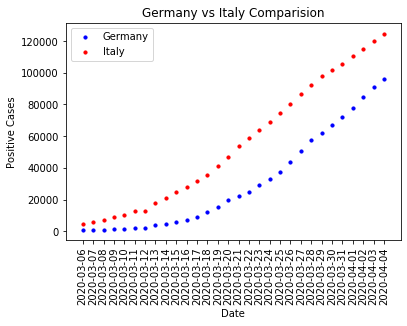

In [217]:
scatterPlotCompare(top10_confirmed, top10_confirmed, 'Germany', 'Italy', 'Comparision', 'Date', 'Positive Cases', RANGE_OF_DAYS)

## Compare Two countries 

Dropdown(options=('ALL', 'China', 'France', 'Germany', 'Iran', 'Italy', 'Spain', 'Turkey', 'US', 'United Kingd…

Dropdown(options=('ALL', 'ConfirmedCases', 'Fatalities'), value='ALL')

Dropdown(options=('ALL', 'China', 'France', 'Germany', 'Iran', 'Italy', 'Spain', 'Turkey', 'US', 'United Kingd…

Dropdown(options=('ALL', 'ConfirmedCases', 'Fatalities'), value='ALL')

'Please select two countries to compare'

'Please select two countries to compare'

'Please select two countries to compare'

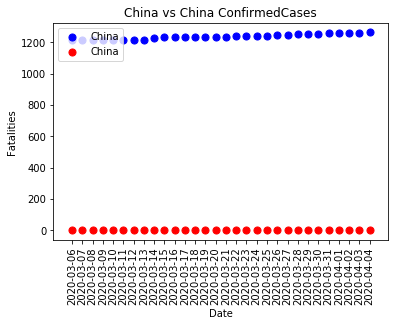

<Figure size 1440x720 with 0 Axes>

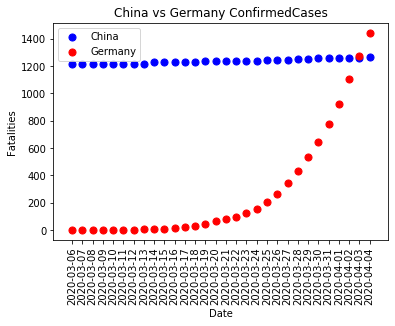

<Figure size 1440x720 with 0 Axes>

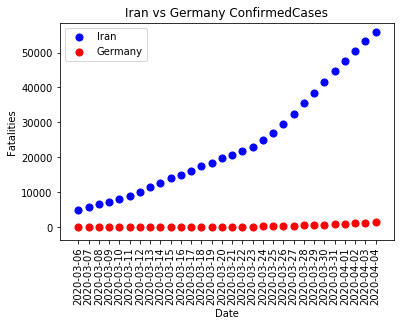

<Figure size 1440x720 with 0 Axes>

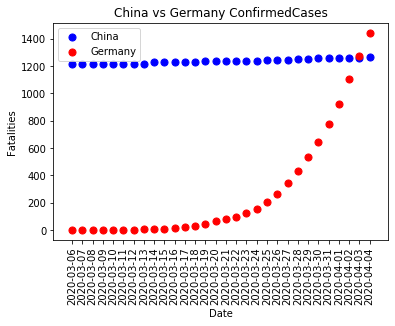

<Figure size 2880x2160 with 0 Axes>

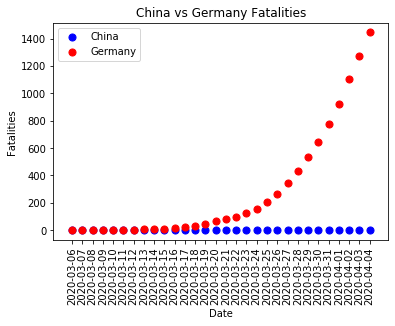

<Figure size 2880x2160 with 0 Axes>

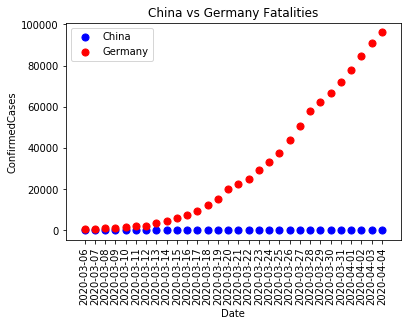

<Figure size 2880x2160 with 0 Axes>

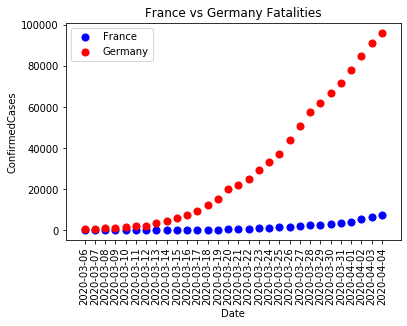

<Figure size 2880x2160 with 0 Axes>

In [253]:
# create two dropdown list of countires
country_dropdown1 = getDropdownList(top10_confirmed, 'Country_Region')
country_dropdown2 = getDropdownList(top10_confirmed, 'Country_Region')
type_dropdown1 = widgets.Dropdown(options = unique_sorted_value_list_plus_ALL(['ConfirmedCases', 'Fatalities']))
type_dropdown2 = widgets.Dropdown(options = unique_sorted_value_list_plus_ALL(['ConfirmedCases', 'Fatalities']))

def common_filter(country1, country2, type1, type2):
    output.clear_output()
    plot_output.clear_output()
    
    if (country1 == ALL or country2 == ALL or type1 == ALL or type2 == ALL):
        display('Please select two countries to compare')
    else:
        scatterPlotCompare(top10_confirmed, top10_confirmed, type1, type2, country1, country2, type1, 'Date', type2, RANGE_OF_DAYS)

def on_country1_change(change):
    common_filter(change.new, country_dropdown2.value, type_dropdown1.value, type_dropdown2.value)

def on_country2_change(change):
    common_filter(country_dropdown1.value, change.new, type_dropdown1.value, type_dropdown2.value)
    
def on_type1_change(change):
    common_filter(country_dropdown1.value, country_dropdown2.value, change.new, type_dropdown2.value)

def on_type2_change(change):
    common_filter(country_dropdown1.value, country_dropdown2.value, type_dropdown1.value, change.new)
    
with output:
    display(common_filter.style.applymap(lambda x: colour_ge_value(x, num), subset=['visits','spend', 'nights']))

country_dropdown1.observe(on_country1_change, names='value')
country_dropdown2.observe(on_country2_change, names='value')
type_dropdown1.observe(on_type1_change, names='value')
type_dropdown2.observe(on_type2_change, names='value')

display(country_dropdown1)
display(type_dropdown1)
display(country_dropdown2)
display(type_dropdown2)
